# Goal of the analysis project: identify the most important features of houses that affect the sale prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
import statsmodels.api as sm

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('house-prices/train.csv')

# 1. Data exploration

Harmonization of columns names

In [3]:
train.columns = [x.replace(' ', '_').lower() for x in train.columns]
train.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [65]:
train.profile_report()

Data can be gathered. Some of them are:

About the basement = 'bsmtqual','bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf'

About the garage = 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond'

About the time = 'yearbuilt', 'yearremodadd','yrsold'

About the energy installations = 'heating','heatingqc', 'centralair', 'electrical', 

About the square feet surface = '1stflrsf', '2ndflrsf', 'lowqualfinsf','wooddecksf', 'openporchsf'

About the location = 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig','landslope', 'neighborhood'

# My main hypothesis is that the value of houses depends on:
- the overall quality of houses 
- the total square feet
- the area location


# 2. Target variable analysis

Looking at the distribution of the sale prices.

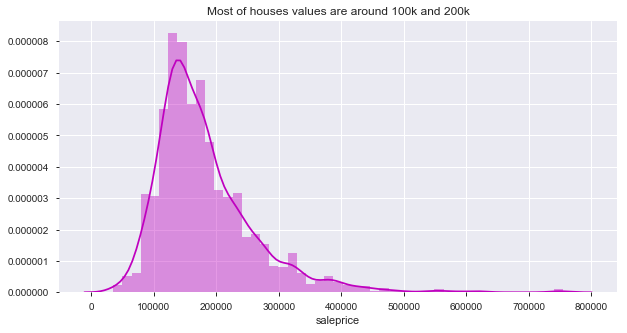

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(train.saleprice, color = 'm').title.set_text('Most of houses values are around 100k and 200k')

Examinating the relationships between the sales price and other features in the dataset. 

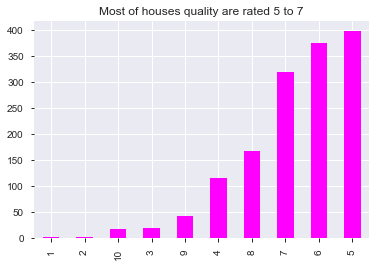

In [6]:
# Identifying the most frequent notation of houses quality.
train['overallqual'].value_counts(ascending = True).plot.bar(color = 'magenta').title.set_text('Most of houses quality are rated 5 to 7')

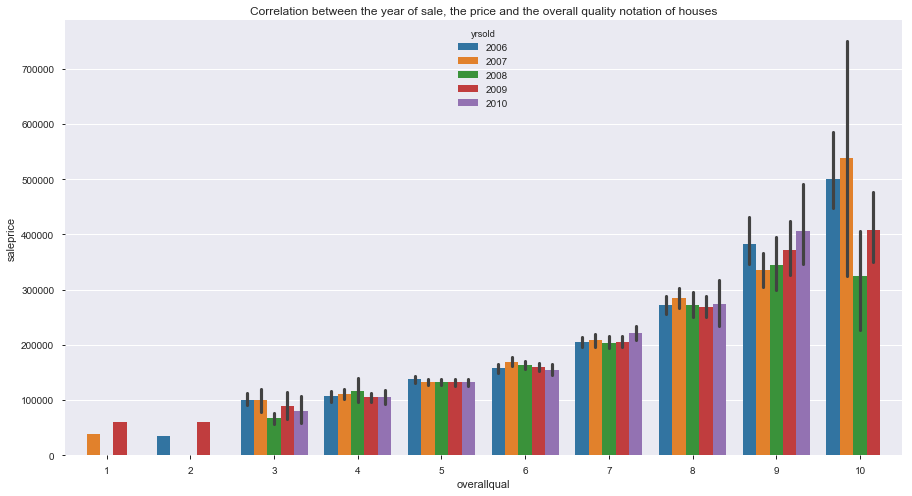

In [63]:
# Seaching for the correlation between the year of sale, the price and the overall quality notation of houses.
plt.figure(figsize=(15,8))
ax = sns.barplot(x="overallqual", y="saleprice", hue="yrsold", data=train).title.set_text('Correlation between the year of sale, the price and the overall quality notation of houses')

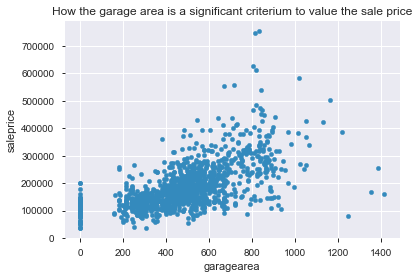

In [102]:
# Looking for the impact of the garage area on the sale price of house

train.plot.scatter(x="garagearea", y="saleprice").title.set_text('How the garage area is a significant criterium to value the sale price')

In [88]:
neighborhoodimpact = train['saleprice'].sort_values(ascending = False).groupby(train['neighborhood']).sum()
neighborhoodimpact

neighborhood
Blmngtn     3312805
Blueste      275000
BrDale      1671900
BrkSide     7240375
ClearCr     5951832
CollgCr    29694866
Crawfor    10741861
Edwards    12821970
Gilbert    15235506
IDOTRR      3704580
MeadowV     1675800
Mitchel     7657236
NAmes      32815593
NPkVill     1284250
NWAmes     13800655
NoRidge    13747108
NridgHt    24352838
OldTown    14489459
SWISU       3564784
Sawyer     10122692
SawyerW    11006792
Somerst    19382666
StoneBr     7762475
Timber      9205403
Veenker     2626500
Name: saleprice, dtype: int64

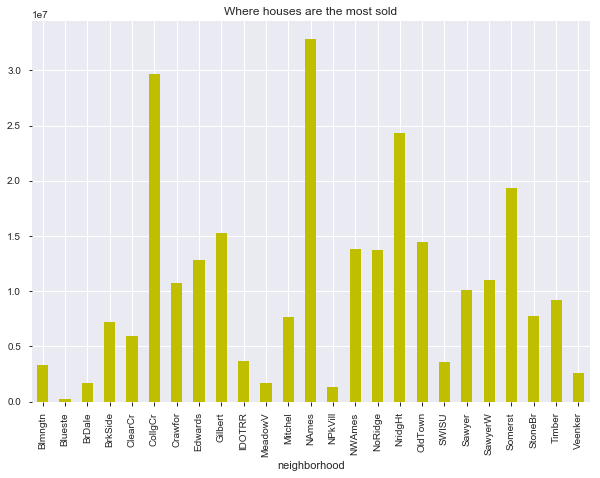

In [89]:
neighborhoodimpact.plot.bar(color = 'y', figsize=(10,7)).title.set_text('Where houses are the most sold')

In [38]:
# Looking for the impact of the number of bedroom on the sale price of house
roomsimpact = train['saleprice'].groupby(train['bedroomabvgr']).sum()
roomsimpact

bedroomabvgr
0      1328959
1      8658121
2     56634762
3    145569724
4     46949727
5      3797200
6      1006453
8       200000
Name: saleprice, dtype: int64

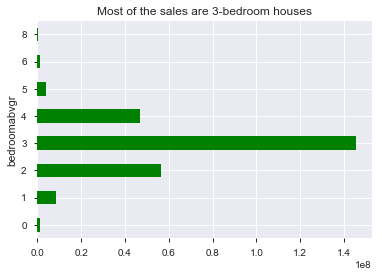

In [39]:
roomsimpact.plot.barh(color = 'green').title.set_text('Most of the sales are 3-bedroom houses')

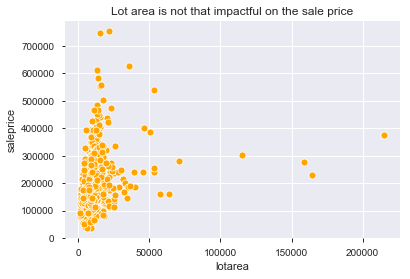

In [11]:
sns.scatterplot(x="lotarea", y="saleprice", color = 'orange', data=train).title.set_text('Lot area is not that impactful on the sale price')

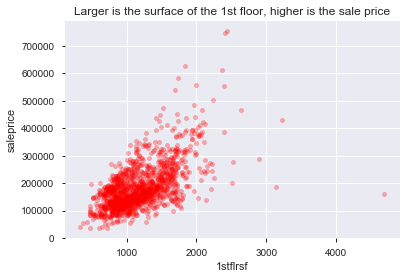

In [12]:
# Looking for the impact of the fisrt floor area on the sale price of house
train.plot.scatter(x='1stflrsf', y='saleprice', color = 'r', alpha = .3).title.set_text('Larger is the surface of the 1st floor, higher is the sale price')

# 3. Big picture analysis

I am looking at the Top 10 features impacting the most the sale price.

In [14]:
top_ten_features = train.corr()['saleprice'].sort_values(ascending=False)[1:11]
print(top_ten_features)

overallqual     0.790982
grlivarea       0.708624
garagecars      0.640409
garagearea      0.623431
totalbsmtsf     0.613581
1stflrsf        0.605852
fullbath        0.560664
totrmsabvgrd    0.533723
yearbuilt       0.522897
yearremodadd    0.507101
Name: saleprice, dtype: float64


Correlation matrix between the series the most linked to the targeted series

In [15]:
train[['fullbath','1stflrsf','totalbsmtsf','garagearea','garagecars','grlivarea','overallqual','saleprice']].corr()

fullbath  1stflrsf  totalbsmtsf  garagearea  garagecars  \
fullbath     1.000000  0.380637     0.323722    0.405656    0.469672   
1stflrsf     0.380637  1.000000     0.819530    0.489782    0.439317   
totalbsmtsf  0.323722  0.819530     1.000000    0.486665    0.434585   
garagearea   0.405656  0.489782     0.486665    1.000000    0.882475   
garagecars   0.469672  0.439317     0.434585    0.882475    1.000000   
grlivarea    0.630012  0.566024     0.454868    0.468997    0.467247   
overallqual  0.550600  0.476224     0.537808    0.562022    0.600671   
saleprice    0.560664  0.605852     0.613581    0.623431    0.640409   

             grlivarea  overallqual  saleprice  
fullbath      0.630012     0.550600   0.560664  
1stflrsf      0.566024     0.476224   0.605852  
totalbsmtsf   0.454868     0.537808   0.613581  
garagearea    0.468997     0.562022   0.623431  
garagecars    0.467247     0.600671   0.640409  
grlivarea     1.000000     0.593007   0.708624  
overallqual   0.593007     1.000000   0.790982  
saleprice     0.708624     0.790982   1.000000

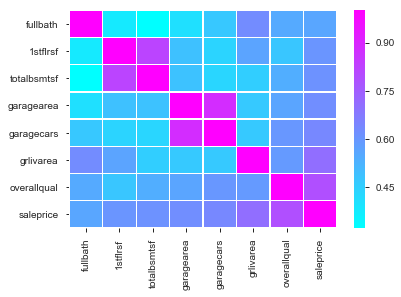

In [17]:
sns.heatmap(train[['fullbath','1stflrsf','totalbsmtsf','garagearea','garagecars','grlivarea','overallqual','saleprice']].corr(),cmap='cool', linewidth = .3)

Intermediate conclusion: I truly see how the surface (ares, sf) may innfluence the sale prices despite the number of rooms is not included in the criterium.

Deeper analysis on correlation between some series (linear regression)

In [18]:
# Overall quality vs sale price

X = train['overallqual']
X = sm.add_constant(X) 
Y = train.saleprice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          2.19e-313
Time:                        14:54:07   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

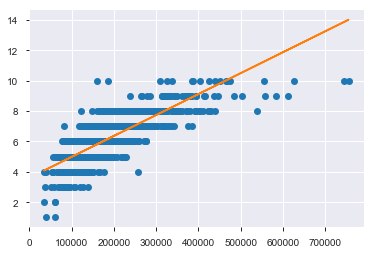

In [19]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(train['saleprice'], train['overallqual'])
line = slope*train['saleprice']+intercept

plt.plot(train['saleprice'],train['overallqual'], 'o')
plt.plot(train['saleprice'], line, '-')

In [20]:
# The garage area vs sale price

X = train['grlivarea']
X = sm.add_constant(X) 
Y = train.saleprice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          4.52e-223
Time:                        14:54:18   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

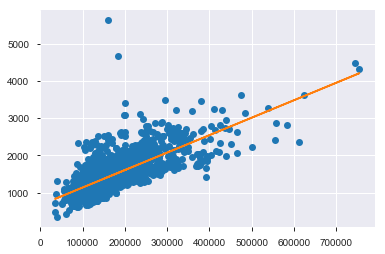

In [21]:
slope, intercept, r_value, p_value, std_err = linregress(train['saleprice'], train['grlivarea'])
line = slope*train['saleprice']+intercept

plt.plot(train['saleprice'],train['grlivarea'], 'o')
plt.plot(train['saleprice'], line, '-')

# 4. Data Cleaning & Manipulation

Remove columns with high proportion of missing values

In [22]:
train = train.drop(columns=['alley','fence', 'miscfeature', 'poolqc'])

Identify all columns regarding square feet information in order to create a new column with the sum of all square feet measures

In [23]:
# I extract all column names with the 'sf' string
sf_col = train.columns[train.columns.str.contains('sf')] #train.loc[:, train.columns.str.endswith('sf')]
sf_col

Index(['bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf',
       '2ndflrsf', 'lowqualfinsf', 'wooddecksf', 'openporchsf'],
      dtype='object')

In [24]:
# I create a subset with all columns about 'sf'
sf_columns = [train['bsmtfinsf1'], train['bsmtfinsf2'], train['bsmtunfsf'], train['totalbsmtsf'], train['1stflrsf'], train['2ndflrsf'], train['lowqualfinsf'], train['wooddecksf'], train['openporchsf']]

# I concatenate the new colum 'total of all sf' to the subset
train['sf_total']=pd.concat(sf_columns,axis=1 ).sum(axis=1)

Same technique on all columns about 'area'

In [25]:
area_col = train.columns[train.columns.str.contains('area')] 
area_col

Index(['lotarea', 'masvnrarea', 'grlivarea', 'garagearea', 'poolarea'], dtype='object')

In [26]:
area_columns = [train['lotarea'], train['masvnrarea'], train['grlivarea'], train['garagearea'], train['poolarea']]
train['area_total']=pd.concat(area_columns,axis=1 ).sum(axis=1)

In [27]:
train.head()

id  mssubclass mszoning  lotfrontage  lotarea street lotshape landcontour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  utilities lotconfig  ... screenporch poolarea miscval mosold yrsold  \
0    AllPub    Inside  ...           0        0       0      2   2008   
1    AllPub       FR2  ...           0        0       0      5   2007   
2    AllPub    Inside  ...           0        0       0      9   2008   
3    AllPub    Corner  ...           0        0       0      2   2006   
4    AllPub       FR2  ...           0        0       0     12   2008   

  saletype  salecondition  saleprice  sf_total  area_total  
0       WD         Normal     208500      3483     10904.0  
1       WD         Normal     181500      4084     11322.0  
2       WD         Normal     223500      3668     13806.0  
3       WD        Abnorml     140000      3264     11909.0  
4       WD         Normal     250000      4764     17644.0  

[5 rows x 79 columns]

Make informed guess on which features should be investigated in depth.

# 5. Data vizualisation

Looking at the high overall quality rate

In [103]:
goodquality = [6,7,8,9,10]
train.overallqual.isin(goodquality)
data1 = train[train.overallqual.isin(goodquality)]
data1.shape

(922, 79)

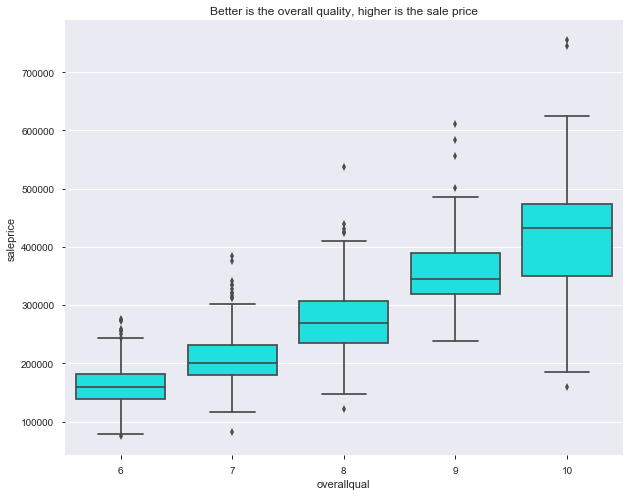

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(x="overallqual", y="saleprice", data=data1, color = 'cyan').title.set_text('Better is the overall quality, higher is the sale price')

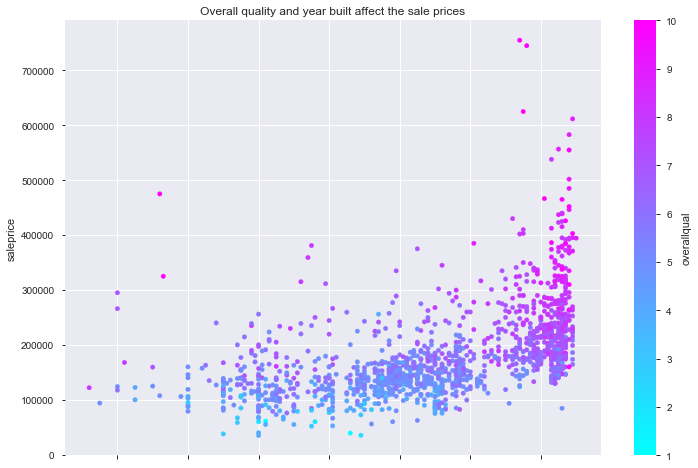

In [60]:
train.plot.scatter(x='yearbuilt', y='saleprice', c='overallqual' , cmap = 'cool', figsize = (12,8), title ='Overall quality and year built affect the sale prices')

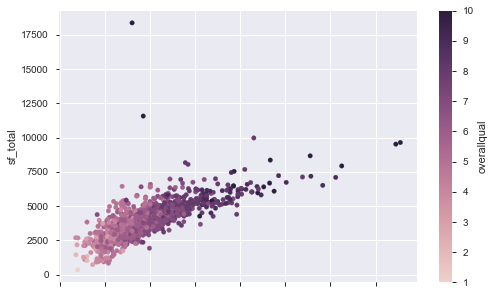

In [30]:
cmap = sns.cubehelix_palette(as_cmap=True)
train.plot.scatter(x="saleprice", y="sf_total", c="overallqual", cmap=cmap, alpha=1, figsize = (8,5),grid=True)

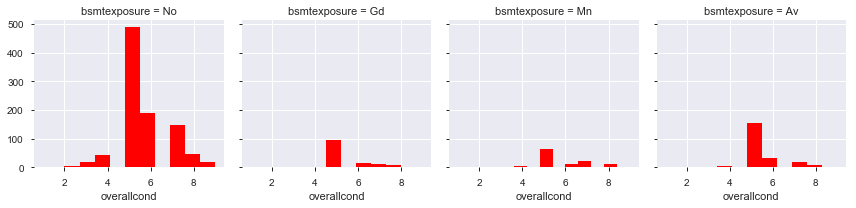

In [100]:
g = sns.FacetGrid(data=train,col='bsmtexposure')
g.map(plt.hist,'overallcond', color = 'r')

For the further prospection of the future houses searchers, most of houses have the Basement exposure "No" and good overall conditions.

Response of the analysis project goal => the most important features of houses that affect the sale prices are the square feet surface and the overall quality.¶